Osnabrück University - Machine Learning (Summer Term 2020) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 08

## Introduction

This week's sheet should be solved and handed in before the end of **Saturday, June 27, 2020**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

The second half of this sheet and the following Sheet 09 will be a recap of previous topics, to help you prepare for the final exam.

Also if you hit any question that should be discussed in more detail in the next practice session, please let us know.

## Assignment 0: Math recap (Conditional Probability) [0 Points]

This exercise is supposed to be very easy and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** Explain the idea of conditional probability. How is it defined?

Conditional probability means the probability of an event x, based on the value of another event y. It is written like $P(x|y)$ (probability of x given y). The probability might change, when the value of y changes, if x and y are somehow relatet to each other. 

Example: The probability of a person being pregnant changes depending on the outcome of a pregnancy test; $P(pregnant|test=positive)$ is probably higher than $P(pregnant|test=negative)$ and higher than $P(pregnant)$. On the other hand the probability of rolling a 6 when the dice before was not a six is independent, so $P(roll2=6|roll1\neq 6) = P(roll2=6)$

**b)** What is Bayes' theorem? What are its applications?

$$P(A|B)=\frac{P(B|A)*P(A)}{P(B)}$$

where $P(A|B)$ is the conditional probability and $P(A)$ a priori probability.

**c)** What does the law of total probability state? 

$$P(A)=P\left(A\mid B\right)\cdot P(B)+P\left(A\mid B^{c}\right)\cdot P\left(B^{c}\right)$$

$P(B^c)$ is the probability of the complementary event.

## Assignment 1: MLP and RBFN [10 Points]

This exercise is aimed at deepening the understanding of Radial Basis Function Networks and how they relate to Multilayer Perceptrons. Not all of the answers can be found directly in the slides - so when answering the (more algorithmic) questions, first take a minute and think about how you would go about solving them and if nothing comes to mind search the internet for a little bit. If you are interested in a real life application of both algorithms and how they compare take a look at this paper: [Comparison between Multi-Layer Perceptron and Radial Basis Function Networks for Sediment Load Estimation in a Tropical Watershed](http://file.scirp.org/pdf/JWARP20121000014_80441700.pdf)

![Schematic of a RBFN](RBFN.png)

We have prepared a little example that shows how radial basis function approximation works in Python. This is not an example implementation of a RBFN but illustrates the work of the hidden neurons.

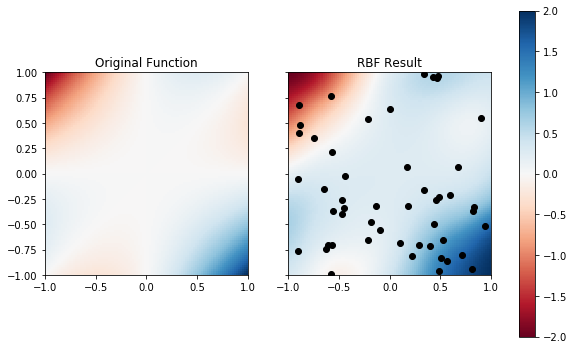

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import uniform

from scipy.interpolate import Rbf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm


def func(x, y):
    """
    This is the example function that should be fitted.
    Its shape could be described as two peaks close to
    each other - one going up, the other going down
    """
    # Different training sizes are sufficient for different functions
    # because of some properties of the function
    #return (x + y) * np.exp(-4.0 * (x**2 + y**2))
    return (x + y) * (x * y)
    # return x ** 4 + y ** 3

# number of training points (you may try different values here)
training_size = 50

# sample 'training_size' data points from the input space [-1,1]x[-1,1] ...
x = uniform(-1.0, 1.0, size=training_size)
y = uniform(-1.0, 1.0, size=training_size)

# ... and compute function values for them.
fvals = func(x, y)

# get the aprroximation via RBF
new_func = Rbf(x, y, fvals)


# Plot both functions:
# create a 100x100 grid of input values
x_grid, y_grid = np.mgrid[-1:1:100j, -1:1:100j]

fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10, 6))
# This plot represents the original function
f_orig = func(x_grid, y_grid)
img = ax[0].imshow(f_orig, extent=[-1, 1, -1, 1], cmap='RdBu')
ax[0].set(title='Original Function')
# This plots the approximation of the original function by the RBF
# if the plot looks strange try to run it again, the sampling
# in the beginning is random
f_new = new_func(x_grid, y_grid)
plt.imshow(f_new, extent=[-1, 1, -1, 1], cmap='RdBu')
ax[1].set(title='RBF Result', xlim=[-1, 1], ylim=[-1, 1])
# scatter the datapoints that have been used by the RBF
plt.scatter(x, y, color='black')
fig.colorbar(img, ax=ax)
plt.show()

### Radial Basis Function Networks

#### What are radial basis functions?

A radial basis function (RBF) is a real function $φ$, where the value is dependent on the distance to the origin $ φ ( x ) = φ ( ‖ x ‖ )$ or a fixed point $c$ such that $φ ( x , c ) = φ ( ‖ x − c ‖ )$
RBFs provide a global approximation of a target function by taking a linear combination of local approximations.


#### What is the structure of a RBFN? You may also use the notion from the above included picture.

Architecture of RBF network:
* A RBFN consists of a single layer of neurons where each neuron gets the same input.
* The activation function of each neuron is unimodal (usually a Gaussian)
* The activation function defines an area of responsibility for the neuron in the input space. This way highly activated neurons contribute more.
* Neurons contribute to a vector with valued output by their weights. This way the output function is represented by a combination of local functions.

#### How is a RBFN trained?

To train a RBFN the following approximations are needed
1. Suitable “centers” or input weights $ξi ∈ ℝ^{d_{in}}$.
2. Suitable “radii of influence” $σ_i$
3. Output weights $w_i ∈ ℝ^{d_{out}}$ to form the output.

To find suitable input weights $ξi$ example instances are used $ξ_i = x_i$. Another way is to perform clustering on the input part of the examples.

To find suitable radii of influence the radius is defined by the distance to the nearest neighbour (or neighbours) which are controlled by $γ: $σ_i = γ ⋅ min_{k≠i} |ξ_i – ξ_k|$

To find suitable output weights $w_i$ use a Perceptron-like rule for weight change where the target value and actual value are compared:
$∆w_i = ε (t – y ) K_i(||x – ξ_i||)$. Another way is to perform Expectation Maximization on all
parameters.

### Comparison to the Multilayer Perceptron

#### What do both models have in common? Where do they differ?

Similarities:
* Each input vector for a neuron is weighted and there is a bias weight w_0 in both MLP and RBFN. The first layer in MLP also gets an input vector to each of the neurons in the layer.
* They both are feed-forward networks but they differ in terms of training. RBFN uses two step algorithm where the inputs are classified into 'prototype' vectors in the hidden layer using k-means clustering and they are further classified to which prototype w.r.t ditance is closer to which output. MLP uses a dot product of weights, input and acivation function to calculate the output of the network. 
* Both have architectural parameters: RBF: One easy to interpret parameter (# basis functions), MLP: # layers, # neurons in each layer, interpretation difficult.

Differences:
* MLP is not local: If a single weight is changed, that might influence the entire network, i.e all output channels. This results in removal of a neuron having a major impact on the net.RBFs provide a global approximation of a target function by a linear combination of local approximations.
* The activation functions: For MLP it's sigmoid functions, whereas for RBFN it's unimodal (mostly Gaussian) functions
* MLP have at least one hidden layer and an input layer. Hidden laters can have different numbers of neurons. RBFN only has an input layer and one Neuron layer.
* Output: MLP has an output layer L_H+1 of neurons, which has the dimensionality of the output vector, whereas RBFN only have an output vector y = w0 + Σi=1…N wi Ki (||x – ξi||).

* MLP uses dot products (between inputs and weights), RBF uses Euclidean distances

#### How can classification in both networks be visualized?

* In RBFN with clusters
* In MPL via Voronoi maps

![classification](https://miro.medium.com/max/812/1*aNeBDke8kLPPCuu29tq-Nw.jpeg)

#### When would you use a RBFN instead of a Multilayer Perceptron?

Because RBFN uses eucleadian distance between inputs and weights they are locally sensitive to changes even though all attributes recieve the same weight. In ML the output is the dot product of inputs, weights and the activation function and training is done through backpropagation.

RBF neural networks are good for novelty detection (if each neuron is centered on a training example, inputs far away from all neurons constitute novel patterns) but not so good at extrapolation. RBFs make it easier to grow new neurons during training.

If not more than one hidden layer is needed, RBF is robust to noise and MLP can make wrong predictions when fed with examples that are similar to their inputs. This is not the case in RBF networks which seems to be due to their non-linear nature of these networks. They are limited because of the small number of layers.


## Recap 1: Concept Learning [2 Points]

### a) Concept Learning

What is Concept Learning? Is it supervised? Is it local?

Concept learning as a task is the problem of finding or defining a general definition of a concept given the training examples which could be members or non-members of the concept. As a search, it can be defined as a task of finding a hypothesis through a large space of hypothesis representation. Concept learning is supervised because, the hypothesis found is found through the training dataset and learning stops when the algorithm achieves an acceptable level of performance.It is local to the training set.


### b) Find-S
Describe the Find-S Algorithm in pseudo code. What is its inductive bias? What are its advantages and drawbacks?

1. Initialize h to the most specific hypothesis in H 
2. For each positive training instance x
    -  For each attribute constraint a, in h
         - If the constraint a, is satisfied by x
             Then do nothing
           Else replace a, in h by the next more general constraint that is satisfied by x
3. Output hypothesis h

Inductive bias: Inductive bias is the set of assumptions a learner uses to predict results given inputs or the labeled training data set, it has not yet encountered.
Its advantages are : 
it provides a nonprocedural means of characterizing the policy for generalizing beyond the observed data and it allows comparison of different learners according to the strength of the inductive bias employed.
Its disadvantages are that it can lead to overgeneralizing by reducing the scope of the data.


### c) Hypotheses space

What is the hypotheses space for Candidate-Elimination used in the lecture?

The Version space they started with in the example in the lecture is the following:

𝐺0←<?,?,?,?,?,?> 
𝑆0←<∅,∅,∅,∅,∅,∅> 
The hypothesis space H is the space over all the hypotheses there are (in this case with the six attributes Sky, Temp, Humid, Wind, Water, Forecast).

## Recap 2: Decision Trees [2 Points]

### a) Overfitting
What is overfitting? How can it be avoided?

Growing each branch of the tree just deeply enough to perfectly classify the training examples can sometimes lead to difficulties when there is noise in the data, or when the number of training examples is too small to produce a representative sample of the true target function. In such cases the algorithm can produce  trees that overfit the data.A hypothesis overfits the training examples if some other hypothesis that fits the training examples less well actually performs better over the entire distribution of instances.
There are several approaches to avoiding overfitting in decision tree learning. These can be grouped into two classes:
- approaches that stop growing the tree earlier, before it reaches the point where it perfectly classifies the training data,
- approaches that allow the tree to overfit the data, and then post-prune the tree.

### b) Pruning

Name one method for pruning a decision tree and describe it!

Reduced error Pruning : 
If each of the decision nodes in the tree are to be candidates for pruning. Pruning a decision node consists of removing the subtree rooted at that node, making it a leaf node, and assigning it the most common classification of the training examples affiliated with that node. 
- Nodes are removed only if the resulting pruned tree performs no worse than-the original over the validation set.   

- This has the effect that any leaf node added due to coincidental regularities in the training set is likely to be pruned because these same coincidences are unlikely to occur in the validation set. 

- Nodes are pruned iteratively, always choosing the node whose removal most increases the decision tree accuracy over the validation set. Pruning of nodes continues until further pruning is harmful (if it decreases accuracy of the tree over the validation set).

- When pruning begins, the tree is at its maximum size and lowest accuracy over the test set. As pruning proceeds, the number of nodes is reduced and accuracy over the test set increases. 

- Here, the available data has been split into three subsets: the training examples, the validation examples used for pruning the tree, and a set of test examples used to provide an unbiased estimate of accuracy over future unseen examples.

- Using a separate set of data to guide pruning is an effective approach pro- vided a large amount of data is available. The major drawback of this approach is that when data is limited, withholding part of it for the validation set reduces even further the number of examples available for training. 

### c) Information gain
What are entropy and information gain? Provide explanation and formulae. How are they used in ID3?

Entropy characterizes the impurity of an arbitrary collection of examples. Given a collection S, containing positive and negative examples of some target concept, the entropy of S relative to this boolean classification is
$$Entropy = \sum_{i=1}^{c} - p_{i} log_{2} p_{i}$$
 Entropy: 

- measures the "impurity" of a set S of training examples
- (convention: 0 log 0 = 0)

 Information gain, is simply the expected reduction in entropy caused by partitioning the examples according to an attribute. The information gain, Gain(S,A) of an attribute A,relative to a collection of examples S, is defined as:
 $$ Gain(S,A) = Entropy(S)- \sum_{v \in A} \frac{|S_{v}|}{|S|} Entropy(S_{v})$$ , where Values(A)is the set of all possible values for attribute A, and S, is the subset of S for which attribute A has value v (i.e., S, = {s E SIA(s) = v).
 
with: 
- E(S) = Entropy before evaluation of A.
- Σ … = Entropy after evaluation of A.
- |Sv| / |S|= Weighting by the fraction of examples that belong to Sv.

 Information gain is precisely the measure used by ID3 to select the best attribute at each step in growing the tree.Information Gain is the expected reduction in Entropy due to sorting on A


ID3:

The idea of ID3 to construct a decision tree (with attributes in the best possible order) is to find the best attribute by the distribution of its values over examples. This attribute is then put at the root of the tree (with one branch for each of its values) and the second best attribute is then picked as a next etc.

The main loop in the algorithm is as follows:
1. A ← the “best” decision attribute for next node.
2. Assign A as decision attribute for node.
3. For each value of A, create new descendant of node.
4. Sort training examples to leaf nodes.
5. If the training examples are perfectly classified then STOP else iterate over new leaf nodes.

For 1., so, the picking of the "best" attribute, one makes use of entropy and information gain to calculate and compare the different possible attributes. The attribute with the highest information gain is chosen.

## Recap 3: Data Mining [2 Points]

### a) Missing values

How can you deal with missing values? Name an important algorithm and explain how to use it.

To deal with missing values, one must fill them in manually.

**Expectation Maximization(EM)**

Procedure:
1. Choose a function to approximate $P(x,y | \theta)$ with parameters $\theta$.
2. Choose start values $\theta_t$.
3. Initialize step counter $t = 0$.
4. E-step: Calculate the integral of 
$$
Q(\theta ,\theta_t) =
 \int P(h | x,\theta_t) \cdot log P(h | x,\theta ) dh
 + log P(x | \theta )
 $$
to obtain the function $Q$ depending on $\theta$ and $\theta_t$.
5. M-step: Maximize $Q$ with respect to $\theta$ :
$$
\theta_{t+1} = argmax_\theta Q(\theta,\theta_t).
$$
6. `t++`.
7. If $Q(\theta,\theta_t)$ does not meet the convergence condition goto **4**.


### b) Outliers

What are outliers? Can we detect them? If so, how?

An outlier is an observation in the data that lies an abnormal distance from other values in a random sample from a population. Outliers may have extreme values (often due to technical reasons) which can spoil statistics. 
Causes of outliers:
1. Errors by measurement / technical errors
2. Unexpected “true” effect
3. Data with high variation – outliers are a natural part of the distribution

We can detect them using z-values or Rosner test. 
Outliers of univariate distributions can be detected from z-values. $$z_{i} =|x_{i}–μ|/σ$$, $z_{i}$ is a measure for the distance of $x_{i}$ from the mean μ in terms of the standard deviation σ.
Commonly, data with $z_{i}$ > 3 are considered outliers.

Detection of several outliers can be done using Rosner test, 
 Iteratively remove outliers until z-tests finds no more.
1. Calculate mean μ or median m and standard deviation σ.
2. Find data point $x_{i*}$ with largest z-value:
$$i* = argmax_{i} z_{i}$$
3. If $x_{i}*$ is an outlier, remove it from the data and goto 1.
4. Stop.
More efficient version:
Remove the k > 1 outliers with largest z-values in each step

### c) Expectation Maximization
What does the Q-function express in the EM algorithm?

E step : $Q(θ,θt) = ∫P(h | x,θt) ⋅ log P(h | x,θ ) dh + log P(x | θ )$ 

Function $Q(h'|h)$ that gives $E[ln P(Y|h')]$ as a function of $h'$, under the assumption that $\theta$ = $h$ and given the observed portion $X$ of the full data $Y$ .
The function Q is written in the form $Q(h'|h)$ to indicate that it is defined in part by the assumption that the current hypothesis $h$ is equal to $\theta$. In its general form, the EM algorithm repeats the following two steps until convergence

Step 1: Estimation (E) step: Calculate $Q(h'|h)$ using the current hypothesis $h$ and
the observed data $X$ to estimate the probability distribution over $Y$ .
$$Q(h'|h) <- E[ln P(Y|h')|h,X]$$

Step 2: Maximization (M) step: Replace hypothesis $h$ by the hypothesis $h'$ that maximizes this $Q$ function.
$$h <- argmaxQ(h'|h) h'$$
When the function $Q$ is continuous, the EM algorithm converges to a stationary point of the likelihood function $P(Y|h')$.When this likelihood function has a single maximum, EM will converge to this global maximum likelihood es- timate for $h'$.
$Q$ represents the average likelyhood. This means, that $Q$ shows us how likely it is that our currently calculated distribution $\theta_t$ has already converged to the expected distribution $\theta$.

## Recap 4: Clustering [4 Points]

### a) Clustering

Explain the difference between single-linkage and complete-linkage clustering.

Single and Complete linkage are different distance measures used in clustering. For single linkage clustering the minimum distance $D_{min}$ is used, for complete linkage clustering the maximum distance $D_{max}$. When performing an agglomerative or divisive clustering algorithm this determines the recalculation of the distance after two clusters are merged (agglomerative) or divided (divisive).

The two linkage criteria have their advantages and disadvantages depending on the data. For chained clusters single linkage clustering might be better fitted than complete linkage clustering. Compact clusters are good for complete linkage clustering.

For example agglomerative single-linkage: Two clusters a and b are merged to one because they are closest to each other. Then the distances to the other remaining clusters must be calculated, for this the minimum of $d(a,x_i)$ and $d(b,x_i)$ is used ($x_{0...n}$ are the remaining n clusters)

### b) Metrics

Name three different distance measures and briefly explain them. Check the metric axioms for one of them.

Minimum distance:
* $D_{min}(X,Y) = min_{x∈X,y∈Y}d(x,y)$
* The distance between the two data points from two clusters (one of each clusters) which are closest together

Maximum distance: 
* $D_{max}(X,Y) = max_{x∈X,y∈Y}d(x,y)$
* The two data points from two clusters which are furthest away

Mean distance:
* $D_{mean}(X,Y) = 1/|X||Y| ∑_{x∈X,y∈Y} d(x,y)$
* Calculate the distance of each of the data points of one cluster with each of the data points of the other cluster
* Take the mean of all the computed distances

Centroid distance: 
* $D_{centroid}(X,Y) = d(1/|X| ∑_{x∈X} x, 1/|Y| ∑_{y∈Y} y)$
* Calculate the mean of all data points from each clusters to get the mean centroid of each clusters
* Take the distance of those centroid points
* $D_{centroid}$ requires numerical attribute values

### c) Mixture models

What is a mixture model? Explain. Can you provide a formula?

A mixture model means that a cluster might not have hard boundaries. Instead the cluster points are assigned a gaussian probability function $P(x)$. This models uncertainty, because a data point doesn't need to have a definite cluster to belong to, but a probability to belong a cluster, thus possibly a probability >0 for more than one cluster. The gaussians are overlapping in a mixture model

**FORMULA ??**

## Recap 5: Dimension Reduction [2 Points]

### a) Visualization

Name three different data visualization techniques to visualize high dimensional data. Explain one in detail.

- **Scatterplot matrix**: Each two features are plotted as a 2d scatterplot. Therefore for n dimensions an n x n matrix of scatterplots is the result, the diagonal just shows the distribution of a single dimension. Scatterplot matrix is useful for lower dimensions.
- **Glyphs (star glyph)**: Also suitable for high dimension data. Data vectors are transformed into a
    - Parallel coordinates (glyph): The horizontal axis contains all the dimensions and for each dimension we make a bar or connect the points to make a graph.
    - Chernoff faces (glyph): Parameters are converted to emoticons of a face.
- **Projections**: Project the n-dimensional data onto a lower dimension to make it visible and understandable for humans. It merely projects data into different dimensions. It depends on the data structure whether this is a useful technique
- **Parallel coordinates**: The values of the data vectors are plotted on a 2-d coordinate system where the x-coordinates represent the different dimensions and the y-coordinates just the value of each dimension. This results in many graphs (or bars, but graphs might be easier to distinguish), which, if they are for example colored depending on the different classes, makes it easy to distinguish between them because of the shapes of the graphs.

### b) PCA

Draw a few data points (ASCII arts or on a sheet of paper) and mark the principal components. What are the principal components?

<pre>
o   o   o   o   o | o   o   o   o   o
o---o---o---o---o-|-o---o---o---o---o
o   o   o   o   o | o   o   o   o   o
</pre>

Principal components are vectors that are orthonomal to the data points, namely those m, which go in the direction of the largest variance. m is significantly smaller than the dimension d of the data. The vectors correspond to the m eigenvectors in the covariance matrix that have the largest eigen values.

### c) Covariance matrix
What does a covariance matrix express? How is it computed from data? How is it used in PCA?

A covariance matrix is a square matrix that shows the covariance between each pair of data points of a given data vector randomly taken. Covariance is the value that shows how the values are related to each other between two random variables. The matrix's diagonal just shows the variances, which means the covariance of each element with itself.

The covariance matrix is needed to express variance in multiple dimensions, because a single number is not enough to characterize variance in a more than one dimensional space. For n dimensional data an n x n matrix is necessary to fully characterize the variation of the data set.